In [27]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

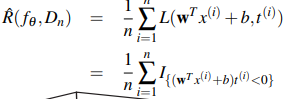

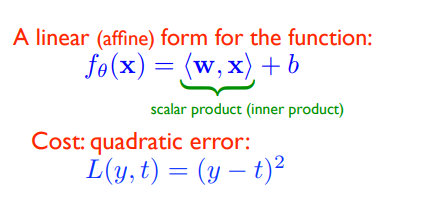

In [28]:
class regression_gradient:
    def __init__(self, capacityCtrl=1, stepSize=1, l=0):
        self.capacityCtrl = capacityCtrl
        self.stepSize = stepSize
        self.l = l
        
        
    def ridgeRegularization(self):
        return np.linalg.norm(self.w)**2 
        
    def lossFunction(self, x, t):
        Fx = self.predict(x)
        return (Fx - t)**2
        
    def empiricalRisk(self, X, T): ## Helps to know if we are doing better or not, this is just additional info. Not actually used in the algo.
        empR = np.sum(self.lossFunction(X,T), axis=0) + self.ridgeRegularization() * self.capacityCtrl
        return empR.reshape((1))[0]
    
    def derivativeW(self, X, T):
        deriv = 2*X.T.dot(self.predict(X) - T) + 2*self.capacityCtrl*np.linalg.norm(self.w)
        avg = deriv / self.n ## The average of all derivatives 
        return avg.reshape((avg.shape[0],1)) 
    
    def derivativeB(self, X, T):
        deriv = 2*(self.predict(X) - T)
        avg = np.sum(deriv, axis=0) / self.n ## The average of all derivatives
        return avg.reshape((avg.shape[0],1)) 
    
    def predict(self, X):
        if (self.d == 1):
            return self.w * X + self.b
        value = np.dot(X, self.w) + self.b
        return value
        
    def learn(self, data, targets, nbSteps = 1000):
        self.trainSet =  data if self.l == 0 else self.mapToNewDataSet(data)
        self.d = self.trainSet.shape[1]
        self.n = self.trainSet.shape[0]
        self.targets = targets
        historyLoss = []
        # init W and b
        self.w = np.zeros(self.d).reshape((self.d,1))
        self.b = 0
        
        i = 0
        while( i < nbSteps):
            new_w = self.w - self.stepSize * self.derivativeW(self.trainSet, self.targets)
            new_b = self.b - self.stepSize * self.derivativeB(self.trainSet, self.targets)
            self.w = new_w
            self.b = new_b
            i += 1
            # just to historize the loss
            historyLoss.append(self.empiricalRisk(self.trainSet, self.targets))

        return historyLoss

    def mapToNewDataSet(self, data):
        if (data.shape[1] > 1):
            raise ValueError("The data set input must not containe a vector of scalars. Where 'x' is of dimention 1 for 'n' examples.")
        initial_n = data.shape[0]
        newDataSet = np.zeros((initial_n, self.l))

        for i in range(initial_n):
            for j in range(self.l):
                if (j == 0):
                    newDataSet[i][j] = data[i]
                else:
                    newDataSet[i][j] = newDataSet[i][j - 1] * data[i]

        return newDataSet

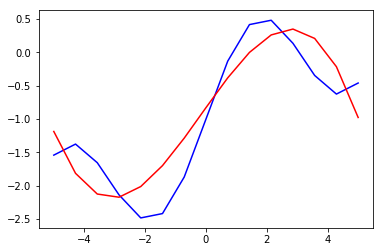

range(0, 20000)


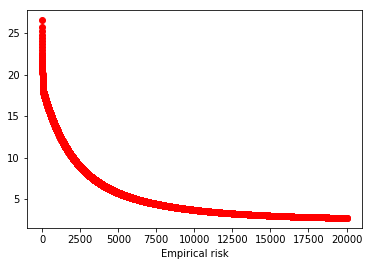

w value  [[ 0.64576263]
 [-0.01010912]
 [-0.02499106]]
b value  [[-0.82824392]]
last Empirical risk:  2.7329357819566966


In [41]:
def H(data):
    targets = np.sin(data) + 0.3*data -1
    return targets

data = np.linspace(-5., 5., 15)
data = data.reshape((15,1))
#print(data)
targets = H(data)
#print(targets)

GD = regression_gradient(0.01,0.0001,3)
historyLoss = GD.learn(data, targets, 20000)
predictions = GD.predict(data if GD.l == 0 else GD.mapToNewDataSet(data))

plt.plot(data,targets, 'b')
plt.plot(data,predictions, 'r')
plt.show()

print (range(0, len(historyLoss)))
plt.plot(np.arange(len(historyLoss)),historyLoss, 'ro')
plt.xlabel("Number of passes")
plt.xlabel("Empirical risk")
plt.show()

print("w value ", GD.w)
print("b value ", GD.b)
print("last Empirical risk: ", historyLoss[-1])